In [53]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [54]:
def read(fit, mock, testdata):
    dic = {}
    with h5py.File(fit, 'r') as f:
        dic['E_f'] = f['E'][:]
        dic['dE_f'] = f['dE'][:]
        dic['R_f'] = f['R'][:]
        dic['dR_f'] = f['dR'][:]
        dic['l'] = f['l'][:]
        dic['dm'] = f['dm'][:]
        dic['C'] = f['C'][:]
        dic['chi'] = f['chi'][:]
    with h5py.File(mock, 'r') as f:
        dic['mag_m'] = f['data'][:]['mag']
        dic['E_m'] = f['r_fit'][:]
        dic['R_m'] = f['R'][:]
        dic['dE_m'] = f['dr_fit'][:]
        dic['dR_m'] = f['dR'][:]
    with h5py.File(testdata, 'r') as f:
        dic['d'] = f['data'][:]
    return dic

In [55]:
dir = 'data/'
mock = dir + 'mock_data.h5'
res = dir + 'mock_result.h5'
data = dir + 'green2020_test_data_small.h5'
lam = ['l1','l2','l3','l4']
B = np.identity(13)
B_inv = B.copy()
B_inv[1:,0] = 1
B[1:,0] = -1

In [56]:
d = read(res, mock, data)
l = len(d['l']['l1'])
sample = int(l*np.random.default_rng(200).random())

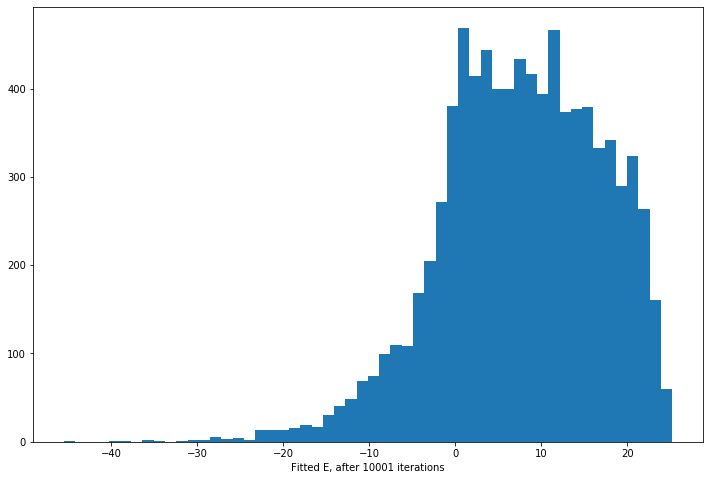

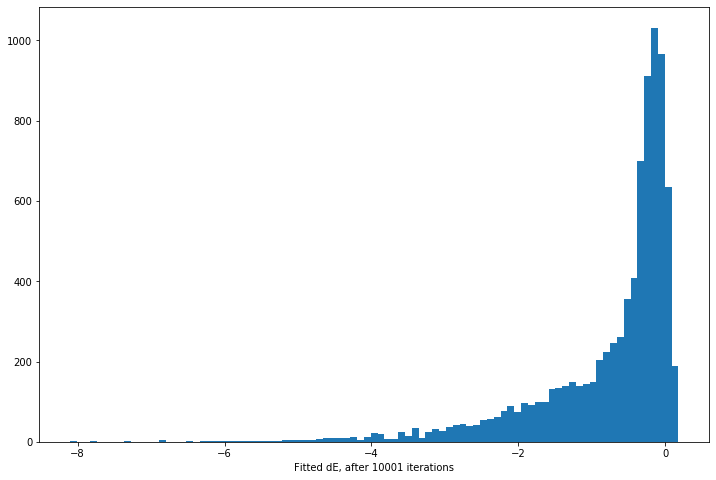

In [57]:
# Distribution of difference between E_mock and E_predict
plt.figure(figsize=(12,8),facecolor='white')
plt.hist(d['E_f'][-1,:]-d['E_m'],bins='auto')
plt.xlabel('Fitted E, after '+str(l)+' iterations')
plt.show()
# Distribution of differences between dE_mock and dE_predict
plt.figure(figsize=(12,8),facecolor='white')
plt.hist(d['dE_f'][-1,:]-d['dE_m'],bins='auto')
plt.xlabel('Fitted dE, after '+str(l)+' iterations')
plt.show()

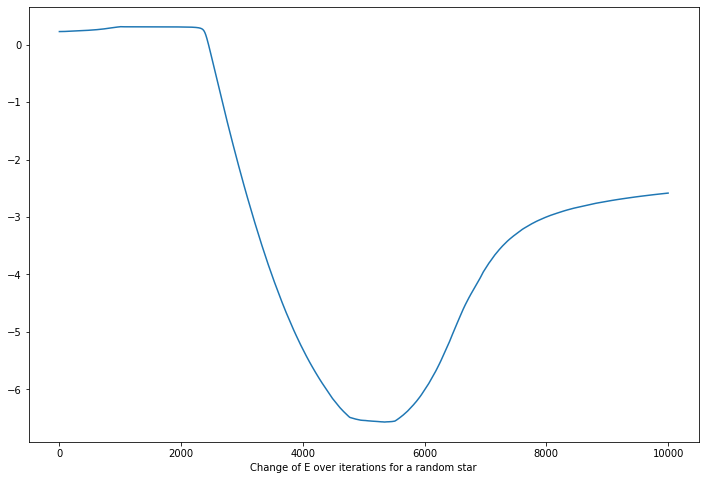

In [58]:
plt.figure(figsize=(12,8),facecolor='white')
plt.plot(range(l),d['E_f'][:,sample])
plt.xlabel('Change of E over iterations for a random star')
plt.show()

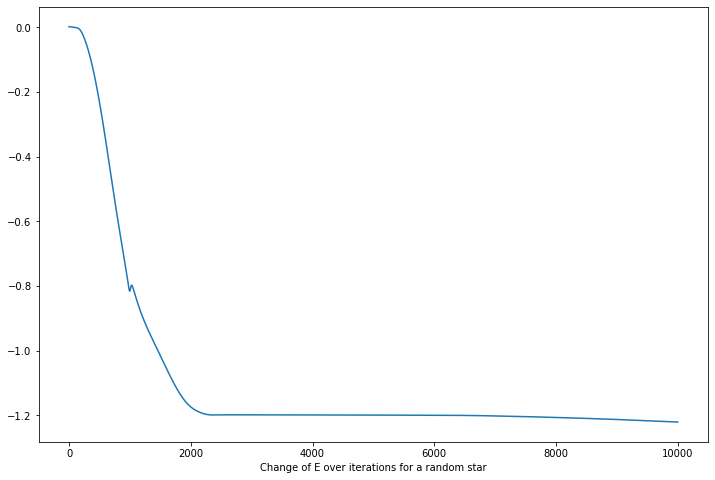

In [59]:
plt.figure(figsize=(12,8),facecolor='white')
plt.plot(range(l-1),d['dE_f'][:,sample])
plt.xlabel('Change of E over iterations for a random star')
plt.show()

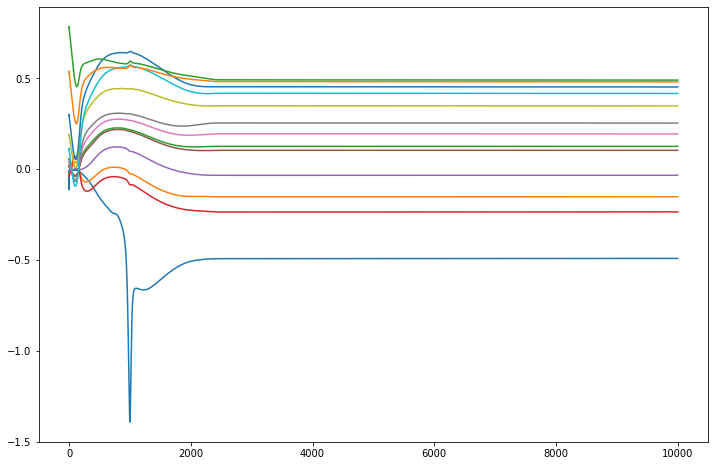

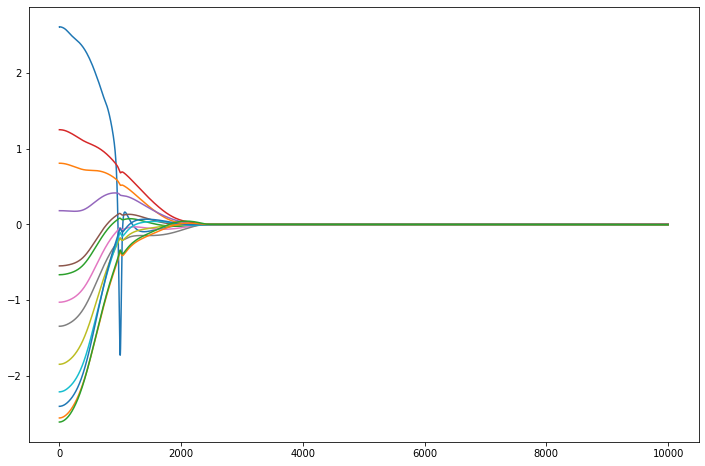

In [60]:
plt.figure(figsize=(12,8),facecolor='white')
for i in range(13):
    plt.plot(range(l),d['dR_f'][:,i])
plt.show()

plt.figure(figsize=(12,8),facecolor='white')
for i in range(13):
    plt.plot(range(l),d['R_f'][:,i])
plt.show()



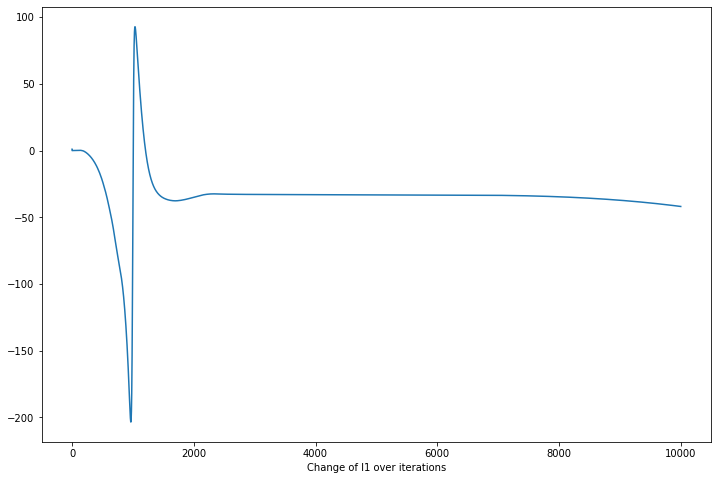

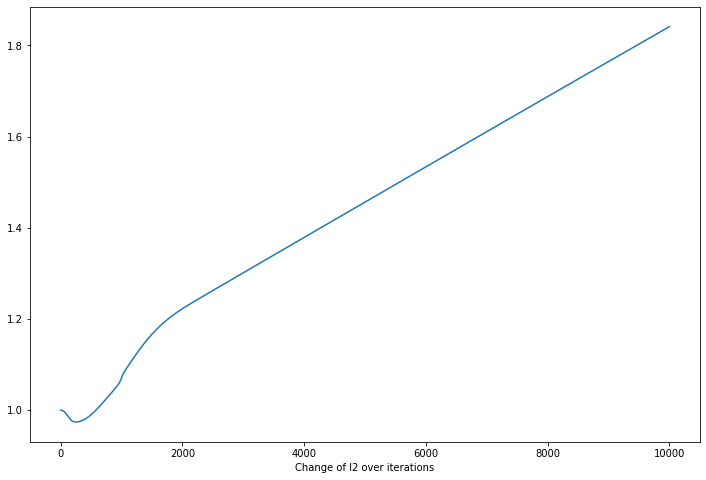

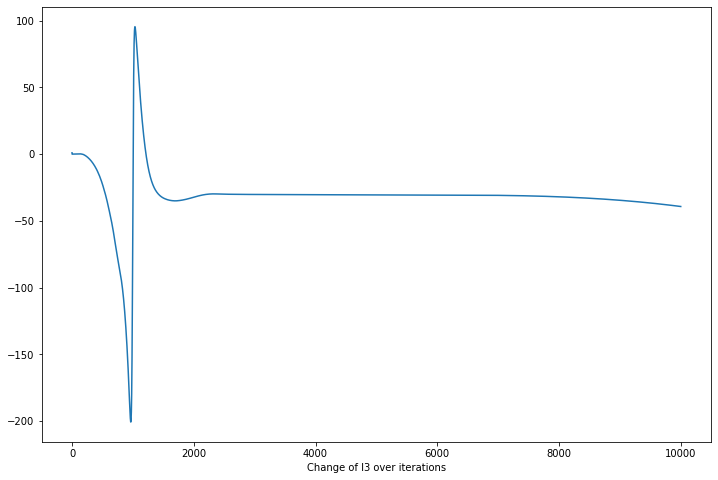

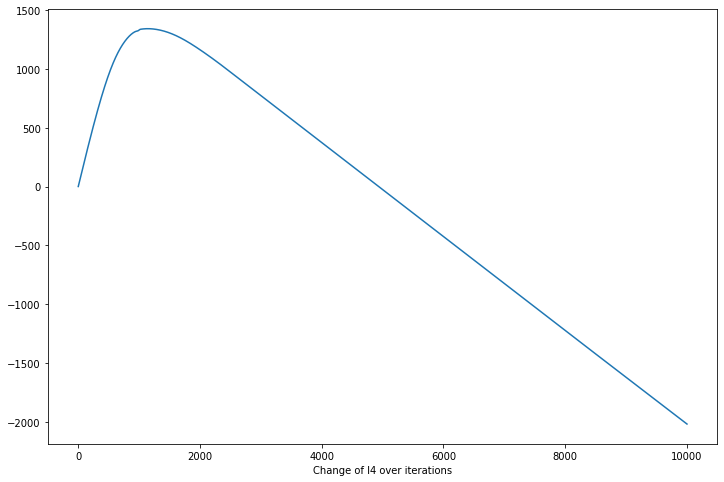

In [61]:
for la in lam:
    plt.figure(figsize=(12,8),facecolor='white')
    plt.plot(range(l),d['l'][la])
    plt.xlabel('Change of ' +la+' over iterations')
    plt.show()

In [69]:
np.std

array([ 0.00375815,  0.00114826, -0.00094671,  0.00178108,  0.00025486,
       -0.00078215, -0.00146219, -0.00191016, -0.00257688, -0.00313378,
       -0.00333187, -0.0034538 , -0.00342928])

In [76]:
if not 8 == 9:
    print('a')

a
